In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

      name  followers  likes  posts personality_type
0    Alice        120     30     10        introvert
1      Bob        340     80     25        extrovert
2  Charlie        560    120     40        extrovert
3    Diana        230     50     15        introvert
4    Ethan        150     40     12        introvert
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              10 non-null     object
 1   followers         10 non-null     int64 
 2   likes             10 non-null     int64 
 3   posts             10 non-null     int64 
 4   personality_type  10 non-null     object
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes
None
personality_type
introvert    5
extrovert    5
Name: count, dtype: int64


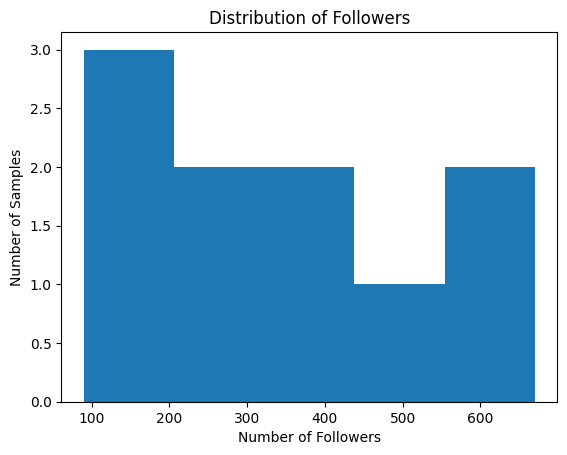

In [24]:
# Create a mock dataset
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Ethan', 'Faye', 'George', 'Hannah', 'Ian', 'Jade'],
    'followers': [120, 340, 560, 230, 150, 670, 480, 300, 90, 410],
    'likes': [30, 80, 120, 50, 40, 150, 100, 70, 20, 110],
    'posts': [10, 25, 40, 15, 12, 50, 35, 20, 8, 30],
    'personality_type': ['introvert', 'extrovert', 'extrovert', 'introvert', 'introvert',
                         'extrovert', 'extrovert', 'introvert', 'introvert', 'extrovert']
}

df = pd.DataFrame(data)

# Display the first 5 rows
print(df.head())

# Display summary of all features
print(df.info())

# Display total number of samples from each label
print(df['personality_type'].value_counts())

# Histogram of followers
plt.hist(df['followers'], bins=5)
plt.xlabel('Number of Followers')
plt.ylabel('Number of Samples')
plt.title('Distribution of Followers')
plt.show()

# Remove the name column
df = df.drop(columns=['name'])

In [25]:
# Convert features into a numpy array
X = df[['followers', 'likes', 'posts']].values

# Convert labels into a numpy array
y = df['personality_type'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the dimensions of each variable
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7, 3)
X_test shape: (3, 3)
y_train shape: (7,)
y_test shape: (3,)


In [29]:
# Create the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

In [30]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision
print("Precision:", precision_score(y_test, y_pred, pos_label='extrovert'))

# Recall
print("Recall:", recall_score(y_test, y_pred, pos_label='extrovert'))

# F1 Score
print("F1 Score:", f1_score(y_test, y_pred, pos_label='extrovert'))

# Full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1 1]
 [0 1]]
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1 Score: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

   extrovert       1.00      0.50      0.67         2
   introvert       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [31]:
# Enter your own features: [followers, likes, posts]
my_features = [[250, 60, 18]]  # ← You can change these numbers to match your own style

# Predict using the trained model
my_prediction = knn.predict(my_features)

# Display the result
print("Predicted Personality Type:", my_prediction[0])

Predicted Personality Type: introvert
